# 6.8630 Final Project

In [4109]:
import numpy as np
import matplotlib.pyplot as plt
import nltk

from tools import PcfgGrammar, PcfgGenerator, flatten_tree
from tools.grammar import DynamicGrammar
from nltk import Nonterminal
from nltk.grammar import ProbabilisticProduction


In [4110]:
main_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/S1.gr', './main-data/grammar/S1_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')

### Helper Functions

In [4111]:
def parse_sentence(grammar, sentence, verbose=False):
    tokens = sentence.split()
    try:
        tree = grammar.get_most_probable_parse(tokens)
        if (tree is None) and verbose:
            print(f'no parse tree found for `{sentence}`')
        return tree
    except ValueError as e:
        if verbose:
            print(f'cannot parse `{sentence}`')
            print(e)
        return None


def parse_many_sentences(grammar, sentences, verbose=False):
    parse_trees = []
    for line in sentences:
        parse_trees.append(parse_sentence(grammar, line, verbose))
    return parse_trees


def read_file_lines(text_file):
    lines = []
    with open(text_file, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('#'):
                continue  # comment
            lines.append(line)
    return lines


def parse_file(grammar, text_file, verbose=False):
    sentences = read_file_lines(text_file)
    return parse_many_sentences(grammar, sentences, verbose)


def cross_entropy_file(grammar, text_file, verbose=False):
    return grammar.get_cross_entropy_over_sentences(read_file_lines(text_file), verbose)

def generate_random_sentences(grammar, num_sentences=5, random_seed=None):
    gen = PcfgGenerator(grammar=grammar, random_seed=random_seed)
    sample_parsed_trees = [gen.generate() for _ in range(num_sentences)]
    sample_sentences = [" ".join(flatten_tree(tree)) for tree in sample_parsed_trees]
    return sample_sentences

def combine_grammars(s1_grammar, s2_grammar, prob_start_to_s1=0.99):
    dynamic_merged = DynamicGrammar(s1_grammar.productions() + s2_grammar.productions())
    dynamic_merged.update_weight(lhs=Nonterminal("START"), rhs=(Nonterminal("S1"),), weight=prob_start_to_s1)
    dynamic_merged.update_weight(lhs=Nonterminal("START"), rhs=(Nonterminal("S2"),), weight=1-prob_start_to_s1)
    merged_grammar = dynamic_merged.get_pcfg_grammar()
    return merged_grammar

In [1]:
def export_grammars(grammar, name):
    ds1 = DynamicGrammar(grammar.productions())
    ds1.update_weight(lhs=Nonterminal("START"), rhs=(Nonterminal("SX"),), weight=1) #does this work

    ds1.export_to_file(vocab_filepath='./main-data/grammar/'+name+'-vocab.gr', rules_filepath='./main-data/grammar/'+name+'.gr') #can we remove the vocab

def song_part_grammar(type):
    train_productions = []
    for sentence in open('./main-data/song-parts/'+type+'.sen', 'r'):
        tokens = sentence.strip().split()
        if main_grammar.can_parse(tokens):
            tree = main_grammar.get_most_probable_parse(tokens)
            train_productions.extend(tree.productions())

    nltk_induced_grammar = nltk.induce_pcfg(main_grammar.start(), train_productions)

    # create a new pcfg grammar
    new_grammar = PcfgGrammar(productions=nltk_induced_grammar.productions())

    export_grammars(new_grammar, type)

In [ ]:
#creates the grammar for all song parts
song_part_grammar('intro')
song_part_grammar('verse')
song_part_grammar('chorus')
song_part_grammar('pre-chorus')
song_part_grammar('post-chorus')
song_part_grammar('hook')
song_part_grammar('bridge')
song_part_grammar('outro')
intro_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/intro.gr', './main-data/grammar/S1_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')
verse_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/verse.gr', './main-data/grammar/S1_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')
chorus_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/chorus.gr', './main-data/grammar/S1_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')
pre_chorus_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/pre-chorus.gr', './main-data/grammar/S1_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')
bridge_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/bridge.gr', './main-data/grammar/S1_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')
hook_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/hook.gr', './main-data/grammar/S1_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')
outro_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/grammar/outro.gr', './main-data/grammar/S1_Vocab.gr'], allowed_words_file='./main-data/allowed_words.txt')


In [ ]:
def create_song():
    intro = generate_random_sentences(intro_grammar, num_sentences = 7)
    verse1 = generate_random_sentences(verse_grammar, num_sentences = 6)
    pre_chorus = generate_random_sentences(pre_chorus_grammar, num_sentences = 4)
    chorus = generate_random_sentences(chorus_grammar, num_sentences = 6)
    verse2 = generate_random_sentences(verse_grammar, num_sentences = 6)
    bridge = generate_random_sentences(bridge_grammar, num_sentences = 7)
    hook = generate_random_sentences(hook_grammar, num_sentences = 5)
    outro = generate_random_sentences(outro_grammar, num_sentences = 5)

    return intro + verse1 + pre_chorus + chorus + verse2 + pre_chorus + chorus + bridge + hook + chorus + outro

#### Gustavo's songs:

Come Hang Out (parsed)

Drama (parsed)

I'm not Famous (parsed)

Three Thirty (parsed)

Turning Out (parsed)

The Good Part (parsed)

In [4112]:
parsed_trees = parse_file(s1_grammar, './main-data/songs/come-hang-out.sen', verbose=True)

In [4113]:
parsed_trees = parse_file(s1_grammar, './main-data/songs/drama.sen', verbose=True)

In [4114]:
parsed_trees = parse_file(s1_grammar, './main-data/songs/im-not-famous.sen', verbose=True)

In [4115]:
parsed_trees = parse_file(s1_grammar, './main-data/songs/three-thirty.sen', verbose=True)

In [4116]:
parsed_trees = parse_file(s1_grammar, './main-data/songs/turning-out.sen', verbose=True)

In [4117]:
parsed_trees = parse_file(s1_grammar, './main-data/songs/the-good-part.sen', verbose=True)

#### Mckinley's Songs:

In [4118]:
#parsed_trees = parse_file(s1_grammar, './main-data/songs/.sen', verbose=True)

In [4119]:
#generate_random_sentences(merged_grammar, num_sentences=10)

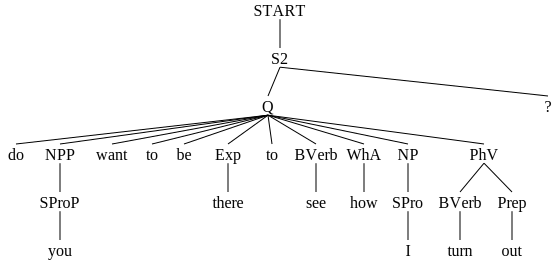

In [4120]:
parse_sentence(merged_grammar, "do you want to be there to see how I turn out ?", verbose = True)